In [1]:
import pandas as pd
from utils import Options
import pickle as pkl
import numpy as np
from glob import glob
from readresults.readres_mvpa import merge_results, parse_roi_info, get_subj_avg
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
reslist = glob('../../MVPA_results/dummytraintest.csv')

In [4]:
results = merge_results(reslist)

In [7]:
avgres = get_subj_avg(results)

In [9]:
avgres

,subject,roi,approach,traindataformat,testdataformat,traintask,testtask,trainmodel,testmodel,correct,output,rawdistance,distance,view
0,sub-001,ba-17-18_L,traintest,betas,betas,train,test,5,17,0.75,0.535714,0.093768,0.546904,1.5


In [5]:
results[results['approach']=='CV'].chunk.unique()

array([], dtype=int64)

In [117]:
from readresults.readres_mvpa import parse_roi_info

In [122]:
results_avg = results.groupby(['subject', 'roi']).mean().reset_index()

In [132]:
results = parse_roi_info(results)

In [134]:
results = results.drop(['chunk'], axis=1)

In [151]:
ind_vars = ['subject', 'roi', 'approach', 
            'traindataformat', 'testdataformat', 'traintask',
            'testtask', 'trainmodel', 'testmodel', 
            'hemi', 'contrast', 'nvoxels']
ind_vars = [i for i in ind_vars if i in results.columns and results[i].nunique() > 0]

In [152]:
results_avg = results.groupby(ind_vars).mean().reset_index()

In [130]:
results_avg = results_avg.drop(['chunk'], axis=1)

In [155]:
results_avg.head()

,subject,roi,approach,traindataformat,testdataformat,traintask,testtask,trainmodel,testmodel,hemi,correct,output,rawdistance,distance
0,sub-001,ba-17-18,traintest,betas,betas,train,test,3,3,L,1.000000,0.500000,-0.281024,0.936912
1,sub-001,ba-17-18,traintest,betas,betas,train,test,3,3,R,1.000000,0.500000,-0.030562,0.925311
2,sub-002,ba-17-18,traintest,betas,betas,train,test,3,3,L,1.000000,0.500000,-0.389375,0.924094
3,sub-002,ba-17-18,traintest,betas,betas,train,test,3,3,R,0.857143,0.500000,-0.137731,0.708643
4,sub-003,ba-17-18,traintest,betas,betas,train,test,3,3,L,0.785714,0.571429,0.218010,0.816236


<AxesSubplot:xlabel='roi', ylabel='distance'>

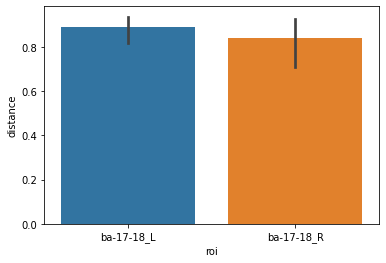

In [102]:
sns.barplot(data=results_avg, x='roi', y='distance')

In [108]:
allinfo = 'LO_contr-objscrvsbas_top-1000'.split('_')

In [109]:
allinfo[1] in ['L', 'R']

False

In [112]:
allinfo

['LO', 'contr-objscrvsbas', 'top-1000']

In [113]:
contrindx = 1

In [115]:
allinfo[contrindx].split('contr-')[1]

'objscrvsbas'

In [116]:
a = [None, None, None]
all(v is None for v in a)

True

<AxesSubplot:xlabel='roi', ylabel='correct'>

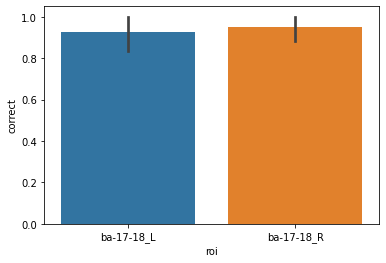

In [95]:
sns.barplot(data=results, x='roi', y='correct')

In [93]:
results[results['roi'].isin(['rBA17_18_L', 'rBA17_18_R',
                             'ba-17-18_L', 'ba-17-18_R'])].distance.mean()

0.867318088704188

In [2]:
outputs = [0.3, 4.0, 6.9, 2.0, 3.5, 0.1]
targets = [4.7, 3.2, 1.0, 2.9, 3.2, 6.8]
splits = [1, 1, 1, 2, 2, 2]
example_res = pd.DataFrame(
    list(zip(outputs, targets, splits)),
    columns=['output', 'target', 'split'])

In [3]:
example_res

,output,target,split
0,0.3,4.7,1
1,4.0,3.2,1
2,6.9,1.0,1
3,2.0,2.9,2
4,3.5,3.2,2
5,0.1,6.8,2


In [55]:
x = np.array([3, 4, 5])
np.isin(x, [5])

array([False, False,  True])

In [21]:
example_res = np.nan
isinstance(example_res, float) and pd.isnull(example_res)

True

In [17]:
pd.isna(example_res).all()

output    False
target    False
split     False
dtype: bool

In [4]:
outs2 = [0.5, 0.65, 1.2]
splits2 = [3, 3, 3]
example_res_2 = pd.DataFrame(
    list(zip(outs2, splits2)),
    columns=['output', 'split'])

In [5]:
all_res = pd.concat([example_res, example_res_2])

In [6]:
all_res

,output,target,split
0,0.30,4.7,1
1,4.00,3.2,1
2,6.90,1.0,1
3,2.00,2.9,2
4,3.50,3.2,2
5,0.10,6.8,2
0,0.50,NaN,3
1,0.65,NaN,3
2,1.20,NaN,3


In [61]:
for s in sorted(example_res.split.unique()):
    thissplitlength = len(example_res[example_res['split']==s])
    example_res.loc[example_res['split']==s, 'sample'] = list(range(thissplitlength))

In [62]:
groupedres = example_res.groupby('sample').mean().reset_index().drop(['sample', 'split'], axis=1)

In [63]:
groupedres

,output,target
0,1.15,3.8
1,3.75,3.2
2,3.50,3.9


In [64]:
agg_functions = {'output': 'mean', 'target': 'sum'}

#create new DataFrame by combining rows with same id values
res_new = example_res.groupby(example_res['split']).aggregate(
    agg_functions)

In [65]:
res_new

,output,target
split,,
1,3.733333,8.9
2,1.866667,12.9


In [66]:
with open('/project/3018040.05/MVPA_results/traintest.pkl', 'rb') as f:
    results = pkl.load(f)

In [78]:
res = results['train-trainm3-test-testm3_ba-17-18_L_betas'][0]
accuracy = res[:, 0]==res[:, 1]
res_df = pd.DataFrame(res, 
                      columns = ['output', 'target', 'distance', 'chunk'])

In [84]:
res_df['trialno'] = 1

In [103]:
res_df.to_numpy()

array([['wide', 'wide', '13.410439466240145', '1', 1],
       ['narrow', 'narrow', '-8.571281490288472', '1', 1],
       ['wide', 'wide', '6.576843347738413', '2', 1],
       ['narrow', 'narrow', '-21.84794215527519', '2', 1],
       ['wide', 'wide', '21.03524958842917', '3', 1],
       ['narrow', 'narrow', '-6.652520055948904', '3', 1],
       ['wide', 'wide', '13.330712892424922', '4', 1],
       ['narrow', 'narrow', '-14.81738834669346', '4', 1],
       ['wide', 'wide', '11.465202636664802', '5', 1],
       ['narrow', 'narrow', '-9.982464918736474', '5', 1],
       ['wide', 'wide', '10.1191606574591', '6', 1],
       ['narrow', 'narrow', '-18.386598502068473', '6', 1],
       ['wide', 'wide', '10.323894916375155', '7', 1],
       ['narrow', 'narrow', '-9.937643097539006', '7', 1]], dtype=object)

In [93]:
accuracy.shape

(14,)

In [95]:
random = np.random.rand(accuracy.shape[0])

In [96]:
random

array([0.73571233, 0.98558475, 0.45546719, 0.15389842, 0.70169345,
       0.48272067, 0.39634474, 0.75589305, 0.76229857, 0.95221889,
       0.66126648, 0.49717198, 0.13552739, 0.31443654])

In [91]:
output = (res[:, 0] == np.unique(res[:, 1])[0]).astype(int)

In [92]:
output

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [77]:
np.mean([True, True, False])

0.6666666666666666

In [74]:
outputs = 

array([['wide', 'wide', '13.410439466240145', '1'],
       ['narrow', 'narrow', '-8.571281490288472', '1'],
       ['wide', 'wide', '6.576843347738413', '2'],
       ['narrow', 'narrow', '-21.84794215527519', '2'],
       ['wide', 'wide', '21.03524958842917', '3'],
       ['narrow', 'narrow', '-6.652520055948904', '3'],
       ['wide', 'wide', '13.330712892424922', '4'],
       ['narrow', 'narrow', '-14.81738834669346', '4'],
       ['wide', 'wide', '11.465202636664802', '5'],
       ['narrow', 'narrow', '-9.982464918736474', '5'],
       ['wide', 'wide', '10.1191606574591', '6'],
       ['narrow', 'narrow', '-18.386598502068473', '6'],
       ['wide', 'wide', '10.323894916375155', '7'],
       ['narrow', 'narrow', '-9.937643097539006', '7']], dtype='<U32')

In [70]:
res_df.distance.dtype

dtype('O')

In [35]:
results['train-trainm3-test-testm3_ba-17-18_L_betas'][0].shape

(14, 4)

In [2]:
opt = Options()

In [4]:
import configs

In [5]:
dir(configs)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'betas_dir',
 'mvpa_outdir',
 'project_dir']

In [6]:
configs.mvpa_outdir

'/project/3018040.05/MVPA_results/'

In [11]:
from configs import mvpa_outdir as data_dir

In [ ]:
from six.moves import cPickle as pickle

In [12]:
data_dir

'/project/3018040.05/MVPA_results/'

In [6]:
mvpa_datadir

'/project'

In [2]:
x

'ab'

In [5]:
opt.sub = 'sub-001'

In [9]:
opt.sub

'sub-001'

In [2]:
eventsfile = '/project/3018040.05/bids/sub-001/func/sub-001_task-test_run-1_events.tsv'
behavfile = '/project/3018040.05/bids/sub-001/func/sub-001_task-test_beh.tsv'
events = pd.read_csv(eventsfile, sep='\t')
behav = pd.read_csv(behavfile, sep='\t')

In [3]:
events

,onset,duration,trial_no,event_no
0,15.067879,0,0,1
1,16.289699,0,0,2
2,18.295492,0,0,3
3,18.795265,0,0,4
4,19.294114,0,0,5
...,...,...,...,...
571,385.435498,0,47,8
572,385.530287,0,47,9
573,385.585264,0,47,10
574,385.639764,0,47,11


In [7]:
bedscenes = [2, 5, 6, 7, 9, 13, 14, 17, 18, 20]
bedindx = behav.index[behav['Scene'].isin(bedscenes)]
couchindx = behav.index[~behav['Scene'].isin(bedscenes)]

In [6]:
bedindx

Int64Index([  0,   2,   3,   4,   6,   7,   8,   9,  17,  19,
            ...
            322, 324, 325, 326, 329, 330, 331, 332, 333, 334],
           dtype='int64', length=168)

In [8]:
couchindx

Int64Index([  1,   5,  10,  11,  12,  13,  14,  15,  16,  18,
            ...
            311, 312, 313, 314, 318, 321, 323, 327, 328, 335],
           dtype='int64', length=168)